In [27]:
import json 
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from datetime import datetime
from collections import Counter

In [ ]:
with open('../conversations.json', 'r') as f:
    conversations = json.load(f)

In [ ]:
convo = conversations[-1]
convo['create_time']
dt = datetime.fromtimestamp(convo['create_time'])


datetime.datetime

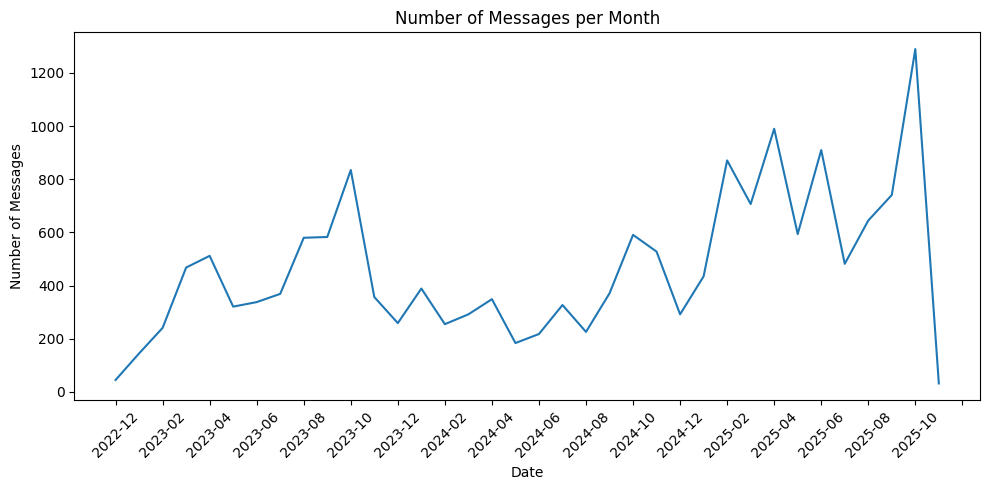

In [32]:
# create graph of user messages over time
dates = []
for convo in conversations:
    for node in convo['mapping'].keys():
            if convo['mapping'][node]['message'] and convo['mapping'][node]['message']['author']['role'] == 'user':
                dt = datetime.fromtimestamp(convo['create_time'])
                dates.append(dt)

date_counts = Counter([d.date() for d in dates])
weekly_counts = Counter([d.strftime('%Y-%U') for d in dates])
monthly_counts = Counter([d.strftime('%Y-%m') for d in dates])

sorted_dates = sorted(monthly_counts.keys())
counts = [monthly_counts[d] for d in sorted_dates]

plt.figure(figsize=(10, 5))
plt.plot(sorted_dates, counts)
plt.title('Number of Messages per Month')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()